# МАДМО

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
Домашнее задание необходимо загрузить в общий репозиторий с именной папкой 


## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [4]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((1000,1000))
b = np.random.sample((1000,1000))
# выведите ранг каждой матрицы с помощью функции np.linalg.rank.
print(np.linalg.matrix_rank(a))
print(np.linalg.matrix_rank(b))
# Используйте функцию shape, что она вывела?
# ======== размер матрицы a и b
print(a.shape, b.shape)

# тут можно писать код 
# ========
print(a)
print(b)

1000
1000
(1000, 1000) (1000, 1000)
[[ 0.73783597  0.27301407  0.93027315 ...,  0.96259324  0.47187815
   0.39580551]
 [ 0.02072496  0.07002215  0.41779741 ...,  0.11057787  0.30702435
   0.07522735]
 [ 0.81368676  0.78648404  0.17100524 ...,  0.69272067  0.39314387
   0.22054027]
 ..., 
 [ 0.08526215  0.46121686  0.78839348 ...,  0.10188287  0.23720454
   0.64714004]
 [ 0.95637142  0.43709625  0.51171651 ...,  0.53433452  0.25762726
   0.49871651]
 [ 0.2595724   0.68426794  0.93402353 ...,  0.56976892  0.14071972
   0.06443066]]
[[ 0.35679122  0.54750139  0.12568162 ...,  0.14640692  0.39744367
   0.90367745]
 [ 0.86421551  0.33549355  0.53374258 ...,  0.65805898  0.82903291
   0.66178167]
 [ 0.66764702  0.3522325   0.10563516 ...,  0.34603562  0.77803956
   0.56627459]
 ..., 
 [ 0.56492245  0.0570081   0.51970474 ...,  0.02397153  0.75391484
   0.74722968]
 [ 0.34267828  0.09762837  0.50493935 ...,  0.49382957  0.17114093
   0.97663113]
 [ 0.58186279  0.17958211  0.98678371 ...,  0.9

In [3]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    c = [[0 for row in range(len(a))] for col in range(len(b[0]))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for l in range(len(b)):
                c[i][j] += a[i][l] * b[l][j]
    return c
    # использования NumPy и выведите результат 
    pass

In [4]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    c = np.dot(a,b)
    return c
    pass

In [ ]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

In [ ]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [ ]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    s = np.cumsum(A) / np.arange(1, len(A) + 1)
    return s
    pass

In [ ]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(len(A)):
        # Ваш код здесь
        S[i] = sum(A[:i+1])
    for i in range(len(A)):
        # Ваш код здесь
        S[i] = S[i]/(i+1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [1]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    # Ваш код здесь
    Y = np.zeros(len(X))
    Y[1::2]=a
    Y[::2]=np.flipud(np.power(X[::2], 3))
    Y =np.concatenate([X, Y], axis =0)
    Y =np.flipud(Y)
    return Y

In [2]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X):
    # Ваш код здесь
    Y =[0 for i in range(len(X))]
    Y[1::2] =[a for i in range(1, len(X), 2)]
    Y1 =X[::2] ** 3
    Y[::2] =Y1[::-1]
    X =list(X)
    Y =X + Y
    Y =Y[::-1]
    return Y

In [5]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 692 ms, sys: 116 ms, total: 808 ms
Wall time: 624 ms


NameError: name 'a' is not defined

NameError: name 'S2' is not defined

Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# Ваш ответ
# За счет реализации на С, не происходит ручная прогонка по циклу

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

In [7]:
grid_x, grid_y = np.meshgrid(np.linspace(-1, 10, 100), np.linspace(-1, 3,140)) # Ваш код здесь
draw_f(gridx, gridy)

NameError: name 'gridx' is not defined

### Задача 5*

Выберите любую картинку и загрузите ее в папку с кодом. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

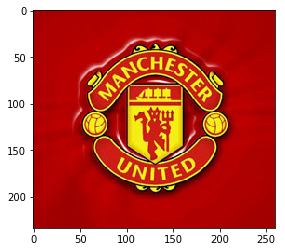

In [9]:
path_to_image = './MU.jpg'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [10]:
flat_image_array = image_array.flatten()# Ваш код здесь

In [11]:
flat_image_array.shape# здесь выведите размер нового массива

(182520,)